<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/QwQ/QwQ_Project_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York City Automated Traffic Volume Counts

This project aims to study the volume of traffic in NYC at bridge crossings and roadways. The dataset consists of 14 columns and 27.4M rows. It is considered as big data and occupies 3.33GB of memory. The dataset is obtained from Kaggle. We have selected this dataset because we like to analyze the traffic volume in NYC. We will perform a series of steps like data processing, data cleaning and visualization on this dataset. Google Colab will be used in this project.

**Team Members:**

1.   MUHAMMAD DINIE HAZIM BIN AZALI
2.   RADIN DAFINA BINTI RADIN ZULKAR NAIN
3.   ADRINA ASYIQIN BINTI MD ADHA
4.   KELVIN EE

## Downloading the Dataset

 

*   This dataset contains all traffic sample volume counts at bridge crossings and roadways.
*   However, these counts do not cover the entire year, and the number of days counted per location may vary from year to year.
*   There are 27.2M samples and 14 feature variables in this dataset.
*   The size of dataset is 3.33GB.

Columns in this dataset:

|Column Name |	Description |	Type |
|---|---|---|
|**RequestID**|An unique ID that is generated for each counts request.|	Number |
|**Boro**|Lists which of the five administrative divisions of New York City the location is within, written as a word|Plain Text|
|**Yr**|The two digit year portion of the date when the count was conducted.|	Number|
|**M**|The two digit month portion of the date when the count was conducted.|	Number|
|**D**|The two digit day portion of the date when the count was conducted.|	Number|
|**HH**|The two digit hour portion of the time when the count was conducted.|	Number|
|**MM**|The two digit start minute portion of the time when the count was conducted.|Number|
|**Vol**|The total sum of count collected within a 15 minute increments.|Number|
|**SegmentID**|The ID that identifies each segment of a street in the LION street network version 14.|Number|
|**WktGeom**|A text markup language for representing vector geometry objects on a map and spatial reference systems of spatial objects.|Plain Text|
|**street**|The 'On Street' where the count took place.|Plain Text|
|**fromSt**|The 'From Street' where the count took place.|Plain Text|
|**toSt**|The 'To Street' where the count took place.|Plain Text|
|**Direction**|The text-based direction of traffic where the count took place.|	Plain Text|


**Step 1**

Download the dataset from [Kaggle](https://www.kaggle.com/datasets/aadimator/nyc-automated-traffic-volume-counts), which is in a zip file format. Extract the file and check the content.

**Step 2**

Upload the dataset to Google Drive and share the link for access.

**Step 3**

Create a link to the dataset on Google Drive and retrieve the dataset for use.

In [ ]:
# Pull dataset from my google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/19ZF66bqoiVy2vtLhKgtvc3yyisUq6Fw7/view?usp=share_link'

# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Automated_Traffic_Volume_Counts.csv') 

## Data Preparation and Cleaning

Data preparation involves cleaning and transforming the data to ensure quality results in the analysis. This includes removing missing, duplicate or outlier data. It is a crucial step in managing large data sets before proceeding to analysis.


**Import Data**

**1. Koalas**

In [ ]:
!pip install koalas
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 15.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=1917163acba8b9aa4be5c76f6ecf1ac0b311e1c402f00f870663469cd9f13442
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import databricks.koalas as ks

In [ ]:
%%time
kdf = ks.read_csv('Automated_Traffic_Volume_Counts.csv')
kdf.head()

CPU times: user 591 ms, sys: 114 ms, total: 705 ms
Wall time: 1min 31s


,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,20856,Queens,2015,6,23,23,30,9,171896,POINT (1052296.600156678 199785.26932711253),94 AVENUE,207 Street,Francis Lewis Boulevard,WB
1,21231,Staten Island,2015,9,14,4,15,6,9896,POINT (942668.0589509147 171441.21296926),RICHMOND TERRACE,Wright Avenue,Emeric Court,WB
2,29279,Bronx,2017,10,19,4,30,85,77817,POINT (1016508.0034050211 235221.59092266942),HUNTS POINT AVENUE,Whittier Street,Randall Avenue,NB
3,27019,Brooklyn,2017,11,7,18,30,168,188023,POINT (992925.4316054962 184116.82855457635),FLATBUSH AVENUE,Brighton Line,Brighton Line,NB
4,26734,Manhattan,2017,11,3,22,0,355,137516,POINT (1004175.9505178436 247779.63624949602),WASHINGTON BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB


**2. PySpark**

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
spark = SparkSession.builder.getOrCreate()

In [ ]:
%%time
s_df = spark.read.csv('Automated_Traffic_Volume_Counts.csv', header=True)
s_df.show(5)

+---------+-------------+----+---+---+---+---+---+---------+--------------------+------------------+--------------------+--------------------+---------+
|RequestID|         Boro|  Yr|  M|  D| HH| MM|Vol|SegmentID|             WktGeom|            street|              fromSt|                toSt|Direction|
+---------+-------------+----+---+---+---+---+---+---------+--------------------+------------------+--------------------+--------------------+---------+
|    20856|       Queens|2015|  6| 23| 23| 30|  9|   171896|POINT (1052296.60...|         94 AVENUE|          207 Street|Francis Lewis Bou...|       WB|
|    21231|Staten Island|2015|  9| 14|  4| 15|  6|     9896|POINT (942668.058...|  RICHMOND TERRACE|       Wright Avenue|        Emeric Court|       WB|
|    29279|        Bronx|2017| 10| 19|  4| 30| 85|    77817|POINT (1016508.00...|HUNTS POINT AVENUE|     Whittier Street|      Randall Avenue|       NB|
|    27019|     Brooklyn|2017| 11|  7| 18| 30|168|   188023|POINT (992925.431...| 

**3. Dask**

In [ ]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dask.dataframe as dd

In [ ]:
%%time
ddf = dd.read_csv('Automated_Traffic_Volume_Counts.csv')
ddf.head()

CPU times: user 878 ms, sys: 78 ms, total: 956 ms
Wall time: 1.28 s


,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,20856,Queens,2015,6,23,23,30,9,171896,POINT (1052296.600156678 199785.26932711253),94 AVENUE,207 Street,Francis Lewis Boulevard,WB
1,21231,Staten Island,2015,9,14,4,15,6,9896,POINT (942668.0589509147 171441.21296926),RICHMOND TERRACE,Wright Avenue,Emeric Court,WB
2,29279,Bronx,2017,10,19,4,30,85,77817,POINT (1016508.0034050211 235221.59092266942),HUNTS POINT AVENUE,Whittier Street,Randall Avenue,NB
3,27019,Brooklyn,2017,11,7,18,30,168,188023,POINT (992925.4316054962 184116.82855457635),FLATBUSH AVENUE,Brighton Line,Brighton Line,NB
4,26734,Manhattan,2017,11,3,22,0,355,137516,POINT (1004175.9505178436 247779.63624949602),WASHINGTON BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB


**Remove null values**

We will remove the null values to avoid it affect the perfomance and accuracy.

**1. Koalas**

In [ ]:
kdf.isnull().sum()

RequestID       0
Boro            0
Yr              0
M               0
D               0
HH              0
MM              0
Vol             0
SegmentID       0
WktGeom         0
street          0
fromSt          0
toSt         2002
Direction       0
dtype: int64

In [ ]:
%%time
kdf = kdf.dropna()

CPU times: user 185 ms, sys: 20.1 ms, total: 205 ms
Wall time: 933 ms


In [ ]:
kdf.isnull().sum()

RequestID    0
Boro         0
Yr           0
M            0
D            0
HH           0
MM           0
Vol          0
SegmentID    0
WktGeom      0
street       0
fromSt       0
toSt         0
Direction    0
dtype: int64

**2. PySpark**

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
s_df1 = s_df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in s_df.columns])
s_df1.show()

+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+
|RequestID|Boro| Yr|  M|  D| HH| MM|Vol|SegmentID|WktGeom|street|fromSt|toSt|Direction|
+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+
|        0|   0|  0|  0|  0|  0|  0|  0|        0|      0|     0|     0|2002|        0|
+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+



In [ ]:
%%time
s_df = s_df.dropna()

CPU times: user 6.17 ms, sys: 1.45 ms, total: 7.62 ms
Wall time: 220 ms


In [ ]:
from pyspark.sql.functions import col,isnan,when,count
s_df1 = s_df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in s_df.columns])
s_df1.show()

+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+
|RequestID|Boro| Yr|  M|  D| HH| MM|Vol|SegmentID|WktGeom|street|fromSt|toSt|Direction|
+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+
|        0|   0|  0|  0|  0|  0|  0|  0|        0|      0|     0|     0|   0|        0|
+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+



**3. Dask**

In [ ]:
ddf.isnull().sum().compute()

In [ ]:
%%time
ddf = ddf.dropna(subset=['toSt'])

In [ ]:
ddf.isnull().sum().compute()

**Drop dupilcated rows**

We will remove duplicate data because it may contaminate our result later.

**1. Koalas**

In [ ]:
print('(',len(kdf),',',len(kdf.columns),')')

( 27188509 , 14 )


In [ ]:
%%time
kdf = kdf.drop_duplicates()

CPU times: user 53.9 ms, sys: 8.14 ms, total: 62 ms
Wall time: 571 ms


In [ ]:
print('(',len(kdf),',',len(kdf.columns),')')

( 26872239 , 14 )


**2. PySpark**

In [ ]:
print('(',s_df.count(),',',len(s_df.columns),')')

( 27188509 , 14 )


In [ ]:
%%time
s_df = s_df.dropDuplicates()

CPU times: user 4.37 ms, sys: 595 µs, total: 4.97 ms
Wall time: 35.6 ms


In [ ]:
print('(',s_df.count(),',',len(s_df.columns),')')

( 26872239 , 14 )


**3. Dask**

In [ ]:
print('(',len(ddf),',',len(ddf.columns),')')

In [ ]:
%%time
ddf = ddf.drop_duplicates()

## Exploratory Analysis and Visualization

**Yearly Distribution**

Let's take a look at the number of distribution of years in the dataset using three different library on pie chart and bar chart.



**Koalas** 

In [ ]:
import matplotlib.pyplot as plt
%time kdf['Yr'].value_counts().plot.pie()

CPU times: user 3.49 s, sys: 497 ms, total: 3.99 s
Wall time: 44.5 s


In [ ]:
%time kdf['Yr'].value_counts().plot.bar()

CPU times: user 1.06 s, sys: 157 ms, total: 1.22 s
Wall time: 52.4 s


**Pyspark** 

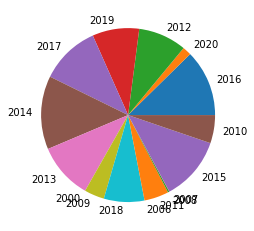

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Yr_Pie_Chart").getOrCreate()


# Compute the value counts of the 'Yr' column
value_counts = s_df.groupBy("Yr").count()
value_counts_pd=value_counts.toPandas()

# Plot the value counts as a pie chart
plt.pie(value_counts_pd['count'], labels=value_counts_pd['Yr'])
plt.show()

**Dask** 

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


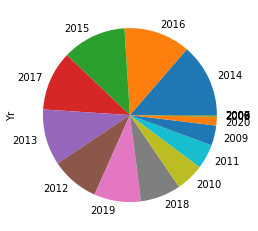

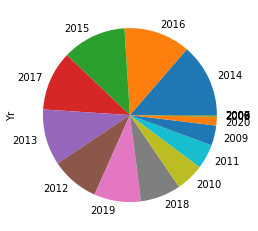

In [ ]:
import matplotlib.pyplot as plt
import dask.delayed as delayed
from dask.distributed import Client

%time
client = Client()

value_counts = ddf['Yr'].value_counts().compute()

# Plot the value counts as a pie chart
delayed(value_counts.plot.pie()).compute()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.87 µs


/usr/local/lib/python3.8/dist-packages/distributed/node.py:180: UserWarning:

Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34343 instead



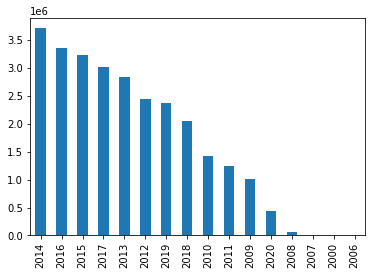

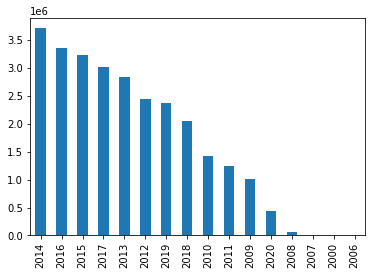

In [ ]:
%time
client = Client()

value_counts = ddf['Yr'].value_counts().compute()

# Plot the value counts as a bar chart
delayed(value_counts.plot.bar()).compute()

## Asking and Answering Questions




In [ ]:
from pyspark.sql.functions import col,isnan,when,count,sum
from pyspark.sql.functions import desc

#### Q1: Which division has the most cars?

**Koalas**

In [ ]:
%time
print(kdf.groupby(['Boro'], as_index=False).Vol.sum().sort_values(by='Vol', ascending=False).head(3))

        Boro        Vol
3  Manhattan  878384457
0     Queens  749302332
1   Brooklyn  652695107


**Pyspark**

In [ ]:
%time
py_div = s_df.groupBy("Boro").agg(sum("Vol").alias("Vol")).sort(col("Vol").desc())
py_div.show(3)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
+---------+------------+
|     Boro|         Vol|
+---------+------------+
|Manhattan|8.78384457E8|
|   Queens|7.49302332E8|
| Brooklyn|6.52695107E8|
+---------+------------+
only showing top 3 rows



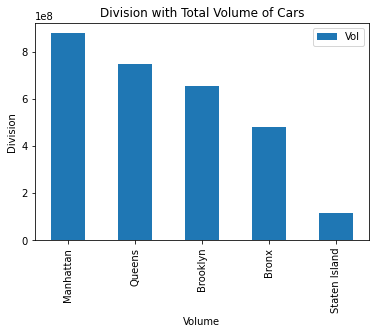

In [ ]:
result = py_div.toPandas()
result.plot(kind='bar', x='Boro', y='Vol', legend=True)
plt.xlabel('Volume')
plt.ylabel('Division')
plt.title('Division with Total Volume of Cars')
plt.show()

**Dask**

In [ ]:
%time
ddf.groupby("Boro").sum().nlargest(3,"Vol").compute().index.tolist()

#### Q2: Which street do most cars go?

**Koalas**

In [ ]:
%time
print(kdf['toSt'].value_counts().sort_values(ascending=False).head(3))

Dead end         2128177
8 Avenue Line     247490
BODY OF WATER     213175
Name: toSt, dtype: int64


**Pyspark**

In [ ]:
%time
py_dir = s_df.groupBy("toSt").agg(count("*").alias("count")).sort(col("count").desc())
py_dir.show(3)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
+-------------+-------+
|         toSt|  count|
+-------------+-------+
|     Dead end|2128177|
|8 Avenue Line| 247490|
|BODY OF WATER| 213175|
+-------------+-------+
only showing top 3 rows



In [ ]:
result1 = py_dir.show(10).toPandas()
plt.figure(figsize=(10, 6))
result1.plot(kind='barh', x='toSt', y='count', legend=True)
plt.xlabel('toSt')
plt.ylabel('count')
plt.title('The Top 10 Street with Highest Count of Cars')
plt.show()

+--------------------+-------+
|                toSt|  count|
+--------------------+-------+
|            Dead end|2128177|
|       8 Avenue Line| 247490|
|       BODY OF WATER| 213175|
|            Dead End| 203858|
|            DEAD END| 165433|
|Harlem River Shor...| 135770|
|                BEND| 134932|
|14 Street/canarsi...| 127484|
|      East 61 Street| 115551|
|            BROADWAY| 112612|
+--------------------+-------+
only showing top 10 rows



AttributeError: ignored

**Dask**

In [ ]:
%time
top_streets = dd.groupby("toSt").sum().nlargest(3,"Vol").compute()
top_streets

#### Q3: In Brooklyn, which street has the highest count of cars?

**Koalas**

In [ ]:
%time
highest_count = kdf[kdf['Boro'] == 'Brooklyn']
highest_count.sort_values(by=['fromSt'], ascending=False).head(1)

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
4630782,10785,Brooklyn,2009,12,1,18,0,223,158041,POINT (1012109.3 153957.3),Flatbush Ave NB Between Belt Pkwy,and Floyd Bennet Field South Entrance,CONNECTOR,NB


**PySpark**

In [ ]:
%time
s_df.filter("Boro == 'Brooklyn'").groupBy("fromSt").agg({"Vol":"sum"}).sort(desc("sum(Vol)")).show(1)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.78 µs


AttributeError: ignored

**Dask**

In [ ]:
%time
ddf[ddf.Boro == 'Brooklyn'].groupby("fromSt").Vol.sum().nlargest(1).compute()

#### Q4: Which year has the least request ID? Display top 5


**Koalas**

In [ ]:
%time
kdf.groupby(['Yr'])['RequestID'].count().sort_values().head()

**PySpark**

In [ ]:
%time
s_df.groupBy(['Yr']).count()

**Dask**

In [ ]:
%time
ddf.groupby(['Yr'])['RequestID'].count().compute().sort_values().head(5)

#### Q5: From each direction, display the total number of streets each car went through

**Koalas**

In [ ]:
%time
kdf.groupby(['Direction'])['street'].count()

**PySpark**

In [ ]:
%time
s_df.groupBy(['Direction']).count().show()

+---------+-----+
|Direction|count|
+---------+-----+
|       NS| 2964|
+---------+-----+
only showing top 1 row



**Dask**

In [ ]:
%time
ddf.groupby(['Direction'])['street'].count().head()

## Inferences and Conclusion 

Koalas, Dask, and PySpark are all tools that can be used for large-scale data processing and analysis.

Koalas is a library that provides a pandas-like API for working with large datasets using Apache Spark. It allows users to perform operations on large datasets using familiar pandas syntax, and it automatically handles the distributed computing and memory management that is required when working with large amounts of data.

Dask is a parallel computing library that can be used to perform parallel and distributed computing on large datasets. It allows users to perform operations on large datasets using familiar numpy and pandas syntax, and it can handle distributed computing and memory management automatically.

PySpark is the Python API for Apache Spark, an open-source, distributed computing system for big data processing. It allows users to perform operations on large datasets using a distributed computing model, and it provides a wide variety of APIs for data processing, machine learning, and graph processing.

In summary, Koalas and Dask are more similar in that they both provide a more familiar API for data processing and analysis, while PySpark is a more general-purpose tool for distributed data processing.

--------------------------------------------------------------------------

Koalas is great for begginers. It is easy to understand and requires little effort. both Koalas and PySpark are based on Spark, one of the fastest distributed computing engines.

Spark is mature and all-inclusive. If you want a single project that does everything and you’re already on Big Data hardware, then Spark is a safe bet, especially if your use cases are typical ETL + SQL and you’re already using Scala.

Dask is lighter weight and is easier to integrate into existing code and hardware. If your problems vary beyond typical ETL + SQL and you want to add flexible parallelism to existing solutions, then Dask may be a good fit, especially if you are already using Python and associated libraries like NumPy and Pandas.

Based on the project, we can conclude that Pyspark library compute the fastest in the overall tasks. PySpark is the best fit which could process operations many times(100x) faster than Pandas. But overall, it all depends on the suitablity to each user.

# Reasons to choose Koalas:
1. Koalas is lazy-evaluated like Spark, i.e., it executes only when triggered by an action.

2. You do not need a separate Spark context/Spark session for processing the Koalas dataframe. Koalas makes use of the existing Spark context/Spark session.

3. Koalas has an SQL API with which you can perform query operations on a Koalas dataframe.

4. By configuring Koalas, you can even toggle computation between Pandas and Spark.

5. Koalas dataframe can be derived from both the Pandas and PySpark dataframes.

# Reasons to choose Pyspark:
(Python is very easy to learn and implement. It provides simple and comprehensive API. With Python, the readability of code, maintenance, and familiarity is far better. It features various options for data visualization, which is difficult using Scala or Java.)

1. You prefer Scala or the SQL language

2. You have mostly JVM infrastructure and legacy systems

3. You want an established and trusted solution for business

4. You are mostly doing business analytics with some lightweight machine learning

5. You want an all-in-one solution

# Reasons to choose Dask:
(Dask is lighter weight and is easier to integrate into existing code and hardware. If your problems vary beyond typical ETL + SQL and you want to add flexible parallelism to existing solutions, then Dask may be a good fit, especially if you are already using Python and associated libraries like NumPy and Pandas.)

1. You prefer Python or native code, or have large legacy code bases that you do not want to entirely rewrite

2. Your use case is complex or does not cleanly fit the Spark computing model

3. You want a lighter-weight transition from local computing to cluster computing

4. You want to interoperate with other technologies and don’t mind installing multiple packages


## References and Future Work

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

https://docs.dask.org/en/stable/spark.html

https://www.machinelearningplus.com/python/dask-tutorial/